This notebook contains draft notes for report.

Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time

from network.mlp import MLP
from network.losses import LossMSE, LossCrossEntropy
from network.activations import Sigmoid, Identity, Softmax, LeakyReLU, ReLU, Tanh
from visualization.visualization import classes_to_one_hot
from network.preprocessing import StandardScaler

In [2]:
square_simple_train = pd.read_csv("./data/regression/square-simple-training.csv")
square_simple_test = pd.read_csv("./data/regression/square-simple-test.csv")
rings3_regular_train = pd.read_csv("./data/classification/rings3-regular-training.csv")
rings3_regular_test = pd.read_csv("./data/classification/rings3-regular-test.csv")
multimodal_large_train = pd.read_csv("./data/regression/multimodal-large-training.csv")
multimodal_large_test = pd.read_csv("./data/regression/multimodal-large-test.csv")
steps_large_train = pd.read_csv("./data/regression/steps-large-training.csv")
steps_large_test = pd.read_csv("./data/regression/steps-large-test.csv")
rings5_regular_train = pd.read_csv("./data/classification/rings5-regular-training.csv")
rings5_regular_test = pd.read_csv("./data/classification/rings5-regular-test.csv")

multimodal_sparse_train = pd.read_csv('./data/regression/multimodal-sparse-training.csv')
multimodal_sparse_test = pd.read_csv('./data/regression/multimodal-sparse-test.csv')

rings3_balance_train = pd.read_csv('./data/classification/rings3-balance-training.csv')
rings3_balance_test = pd.read_csv('./data/classification/rings3-balance-test.csv')

rings5_sparse_train = pd.read_csv('./data/classification/rings5-sparse-training.csv')
rings5_sparse_test = pd.read_csv('./data/classification/rings5-sparse-test.csv')

xor3_balance_train = pd.read_csv('./data/classification/xor3-balance-training.csv')
xor3_balance_test = pd.read_csv('./data/classification/xor3-balance-test.csv')

Batches 

In [ ]:
layers = [
    {"output_size" : 50, "activation" : Sigmoid(), "init" : "xavier_normal"},
    {"output_size" : 1, "activation" : Identity(), "init" : "xavier_normal"}
]

random_states = [0, 101, 202, 303, 404]

time_batches = []
time_no_batches = []
losses_no_batches = []
losses_batches = []

x = square_simple_train[["x"]].to_numpy()
y = square_simple_train[["y"]].to_numpy()
    
for i in range(5):
    # no batches
    mlp_1 = MLP(layers_init=layers, input=square_simple_train[["x"]], loss_function=LossMSE(), random_state=random_states[i])

    t1_0 = time.time()
    mlp_1.train(x, y, learning_rate=0.04, epochs=6000)
    t1_1 = time.time()

    # batches
    mlp_2 = MLP(layers_init=layers, input=square_simple_train[["x"]], loss_function=LossMSE(), random_state=random_states[i])

    t1_2 = time.time()
    mlp_2.train(x, y, learning_rate=0.04, epochs=6000, batch_size=32)
    t1_3 = time.time()
    
    time_no_batches.append(t1_1 - t1_0)
    time_batches.append(t1_3 - t1_2)
    
    losses_no_batches.append(mlp_1.get_training_history()["losses"])
    losses_batches.append(mlp_2.get_training_history()["losses"])
    
# create a dataframe with the results
df = pd.DataFrame({
    "random_state": random_states,
    "time_no_batches": time_no_batches,
    "time_batches": time_batches,
    "loss_no_batches": [loss[-1] for loss in losses_no_batches],
    "loss_batches": [loss[-1] for loss in losses_batches]
})




Epoch:	0	Loss (MSE):	9382.5545
Epoch:	1000	Loss (MSE):	48.8775
Epoch:	2000	Loss (MSE):	19.6127
Epoch:	3000	Loss (MSE):	11.2608
Epoch:	4000	Loss (MSE):	7.8219
Epoch:	5000	Loss (MSE):	5.7513
Final epoch:	5999	Loss (MSE):	4.5019
Epoch:	0	Loss (MSE):	8260.3274
Epoch:	1000	Loss (MSE):	7.9509
Epoch:	2000	Loss (MSE):	2.9729
Epoch:	3000	Loss (MSE):	1.5791
Epoch:	4000	Loss (MSE):	1.1422
Epoch:	5000	Loss (MSE):	0.9008
Final epoch:	5999	Loss (MSE):	0.7392
Epoch:	0	Loss (MSE):	9383.4644
Epoch:	1000	Loss (MSE):	39.3989
Epoch:	2000	Loss (MSE):	13.5666
Epoch:	3000	Loss (MSE):	7.0950
Epoch:	4000	Loss (MSE):	4.4622
Epoch:	5000	Loss (MSE):	3.1608
Final epoch:	5999	Loss (MSE):	2.4105
Epoch:	0	Loss (MSE):	8290.8133
Epoch:	1000	Loss (MSE):	4.3860
Epoch:	2000	Loss (MSE):	1.6409
Epoch:	3000	Loss (MSE):	0.9652
Epoch:	4000	Loss (MSE):	0.6262
Epoch:	5000	Loss (MSE):	0.4532
Final epoch:	5999	Loss (MSE):	0.3488
Epoch:	0	Loss (MSE):	9322.2845
Epoch:	1000	Loss (MSE):	47.6512
Epoch:	2000	Loss (MSE):	17.6822
Epoch:	3

In [11]:
print("Time no batches: ", time_no_batches)
print("Time no batches mean: ", sum(time_no_batches)/len(time_no_batches))
print("Time batches: ", time_batches)
print("Time batches mean: ", sum(time_batches)/len(time_batches))

Time no batches:  [0.6037347316741943, 0.5888671875, 0.5876278877258301, 0.5899789333343506, 0.604032039642334]
Time no batches mean:  0.5948481559753418
Time batches:  [1.7347359657287598, 1.7094829082489014, 1.7278132438659668, 1.7692251205444336, 1.7074449062347412]
Time batches mean:  1.7297404289245606


In [13]:
print(df)

   random_state  time_no_batches  time_batches  loss_no_batches  loss_batches
0             0         0.595103      1.861341         4.501919      0.739204
1           101         0.669708      1.780819         2.410498      0.348845
2           202         0.609372      1.825414         2.578982      0.371196
3           303         0.604190      1.746249         3.701200      0.734541
4           404         0.591667      1.745619         2.423255      0.343568


In [20]:
# Create a DataFrame with losses for batch and no batch training
loss_data = []

for run, (loss_batch, loss_no_batch) in enumerate(zip(losses_batches, losses_no_batches)):
    for epoch, (batch_loss, no_batch_loss) in enumerate(zip(loss_batch, loss_no_batch), start=1):
        loss_data.append({"ID": (random_states[run], epoch), "Epoch": epoch, "Loss": batch_loss, "Type": "Batch"})
        loss_data.append({"ID": (random_states[run], epoch), "Epoch": epoch, "Loss": no_batch_loss, "Type": "No Batch"})

loss_df = pd.DataFrame(loss_data)
loss_df.head()

,ID,Epoch,Loss,Type
0,"(0, 1)",1,8260.327409,Batch
1,"(0, 1)",1,9382.554477,No Batch
2,"(0, 2)",2,7360.032154,Batch
3,"(0, 2)",2,9016.851374,No Batch
4,"(0, 3)",3,6692.395427,Batch


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

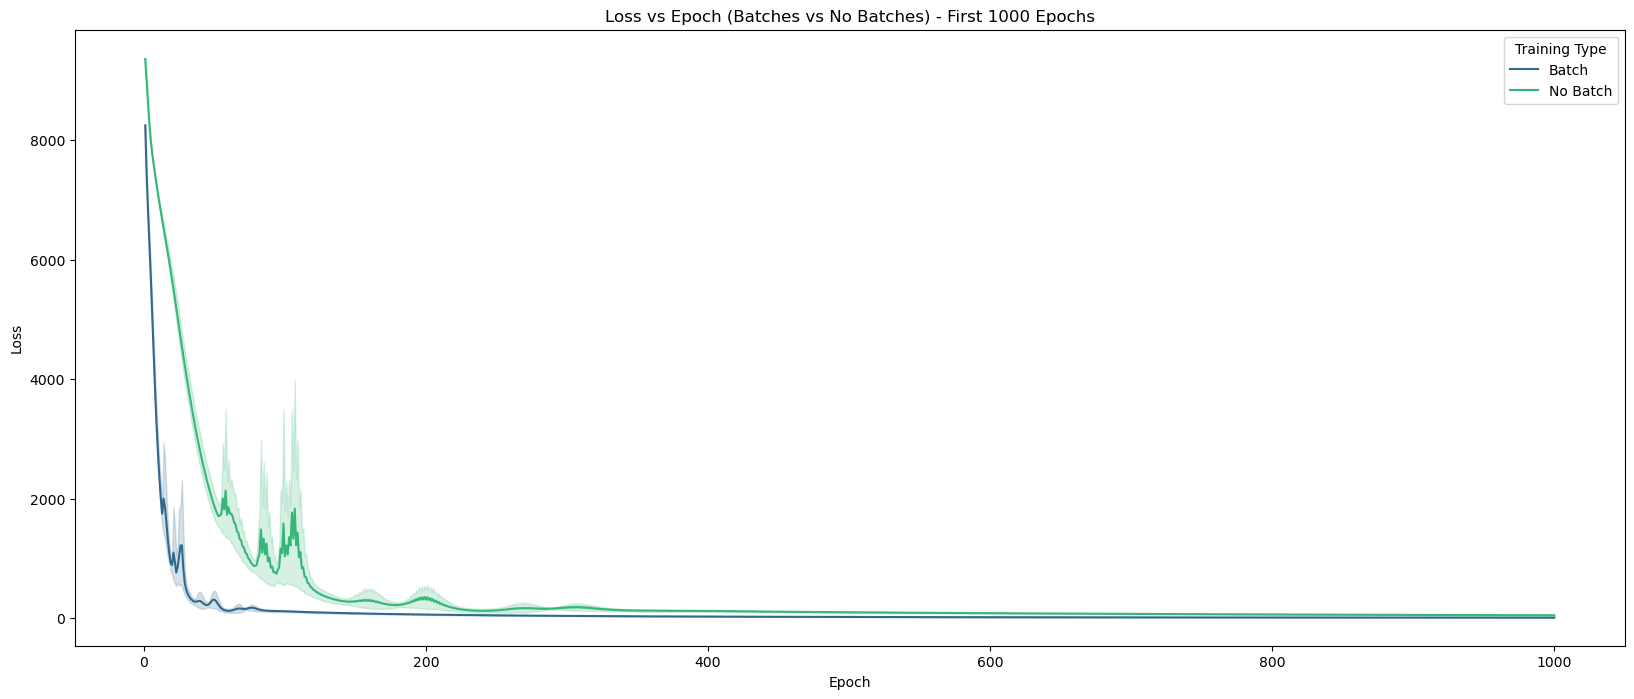

In [34]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=loss_df[loss_df["Epoch"] <= 1000], x="Epoch", y="Loss", hue="Type", palette="viridis")
plt.title("Loss vs Epoch (Batches vs No Batches) - First 1000 Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(title="Training Type")
plt.show()

Momentum and rmsprop

In [ ]:
layers  = [
    {"output_size" : 50, "activation" : Sigmoid(), "init" : "xavier_normal"},
    {"output_size" : 1, "activation" : Identity(), "init" : "xavier_normal"}]

random_states = [0, 101, 202, 303, 404]

rms_prop_times = []
momentum_times = []
losses_rmsprop = []
losses_momentum = []

x_train = multimodal_large_train[["x"]].to_numpy()
y_train = multimodal_large_train[["y"]].to_numpy()
x_test = multimodal_large_test[["x"]].to_numpy()
y_test = multimodal_large_test[["y"]].to_numpy()

epochs  = 10_000
loss_value_to_achieve = 8.99
learning_rate_rmsprop = 0.2
learning_rate_momentum = 0.01
beta = 0.9
weights_decay = 0.9


for i in range(5):      
    mlp_rmsprop = MLP(layers_init=layers,
                      input=x_train,
                      random_state=random_states[i],
                      loss_function=LossMSE())
    
    mlp_momentum = MLP(layers_init=layers,
                      input=x_train,
                      random_state=random_states[i],
                      loss_function=LossMSE())
    
    print("----- RMSProp -----")
    t0 = time.time()
    mlp_rmsprop.train(X_train=x_train,
                      Y_train=y_train,
                      epochs=epochs,
                      stop_loss=loss_value_to_achieve,
                      method="rmsprop",
                      learning_rate=learning_rate_rmsprop,
                      beta=beta
                      )
    t1 = time.time()
    mlp_rmsprop_training_history = mlp_rmsprop.get_training_history()
    
    print("----- Momentum -----")
    
    t2 = time.time()
    mlp_momentum.train(X_train=x_train,
                       Y_train=y_train,
                       epochs=epochs,
                       stop_loss=loss_value_to_achieve,
                       method="momentum",
                       learning_rate=learning_rate_momentum,
                       weights_decay=weights_decay
                       )
    t3 = time.time()
    mlp_momentum_training_history = mlp_momentum.get_training_history()

    y_pred_rmsprop = mlp_rmsprop.forward(x_test)
    y_pred_momentum = mlp_momentum.forward(x_test)

    rms_prop_times.append(t1 - t0)
    momentum_times.append(t3 - t2)
    losses_rmsprop.append(mlp_rmsprop_training_history["losses"])
    losses_momentum.append(mlp_momentum_training_history["losses"])

----- RMSProp -----
Epoch:	0	Loss (MSE):	5126.1009
Epoch:	1000	Loss (MSE):	890.2355
Epoch:	2000	Loss (MSE):	875.6911
Epoch:	3000	Loss (MSE):	870.0498
Epoch:	4000	Loss (MSE):	866.7414
Epoch:	5000	Loss (MSE):	134.0389
Epoch:	6000	Loss (MSE):	43.1856
Epoch:	7000	Loss (MSE):	37.3214
Epoch:	8000	Loss (MSE):	34.3957
Epoch:	9000	Loss (MSE):	31.5551
Final epoch:	9999	Loss (MSE):	30.4356
----- Momentum -----
Epoch:	0	Loss (MSE):	5277.9903
Epoch:	1000	Loss (MSE):	59.8089
Epoch:	2000	Loss (MSE):	18.7737
Epoch:	3000	Loss (MSE):	12.8187
Epoch:	4000	Loss (MSE):	10.7359
Epoch:	5000	Loss (MSE):	9.6323
Final epoch:	5947	Loss (MSE):	8.9897
----- RMSProp -----
Epoch:	0	Loss (MSE):	5112.8082
Epoch:	1000	Loss (MSE):	893.4680
Epoch:	2000	Loss (MSE):	879.5413
Epoch:	3000	Loss (MSE):	872.9176
Epoch:	4000	Loss (MSE):	868.0909
Epoch:	5000	Loss (MSE):	863.5978
Epoch:	6000	Loss (MSE):	859.6333
Epoch:	7000	Loss (MSE):	708.4677
Epoch:	8000	Loss (MSE):	579.4506
Epoch:	9000	Loss (MSE):	573.2610
Final epoch:	9999	Loss

In [38]:
df = pd.DataFrame({
    "random_state": random_states,
    "time_rmsprop": rms_prop_times,
    "time_momentum": momentum_times,
    "epochs_rmsprop": [len(loss) for loss in losses_rmsprop],
    "epochs_momentum": [len(loss) for loss in losses_momentum],
    "loss_rmsprop": [loss[-1] for loss in losses_rmsprop],
    "loss_momentum": [loss[-1] for loss in losses_momentum],
})

print(df)

   random_state  time_rmsprop  time_momentum  epochs_rmsprop  epochs_momentum  \
0             0     94.367160      54.780466           10000             5948   
1           101     95.733692      42.160444           10000             4576   
2           202     93.250466      37.053508           10000             4024   
3           303     91.914284      37.715919           10000             4115   
4           404     92.699652      46.677648           10000             5010   

   loss_rmsprop  loss_momentum  
0     30.435583       8.989709  
1    570.624760       8.988316  
2     29.289702       8.989746  
3     28.174079       8.989638  
4     27.901414       8.989534  


In [39]:
loss_data = []

for run, (loss_rms, loss_mom) in enumerate(zip(losses_rmsprop, losses_momentum)):
    for epoch, (rms_loss, mom_loss) in enumerate(zip(loss_rms, loss_mom), start=1):
        loss_data.append({"ID": (random_states[run], epoch), "Epoch": epoch, "Loss": rms_loss, "Type": "RMSProp"})
        loss_data.append({"ID": (random_states[run], epoch), "Epoch": epoch, "Loss": mom_loss, "Type": "Momentum"})
loss_df = pd.DataFrame(loss_data)
loss_df.head()

,ID,Epoch,Loss,Type
0,"(0, 1)",1,5126.100885,RMSProp
1,"(0, 1)",1,5277.990285,Momentum
2,"(0, 2)",2,4932.730685,RMSProp
3,"(0, 2)",2,5209.413190,Momentum
4,"(0, 3)",3,4709.235099,RMSProp


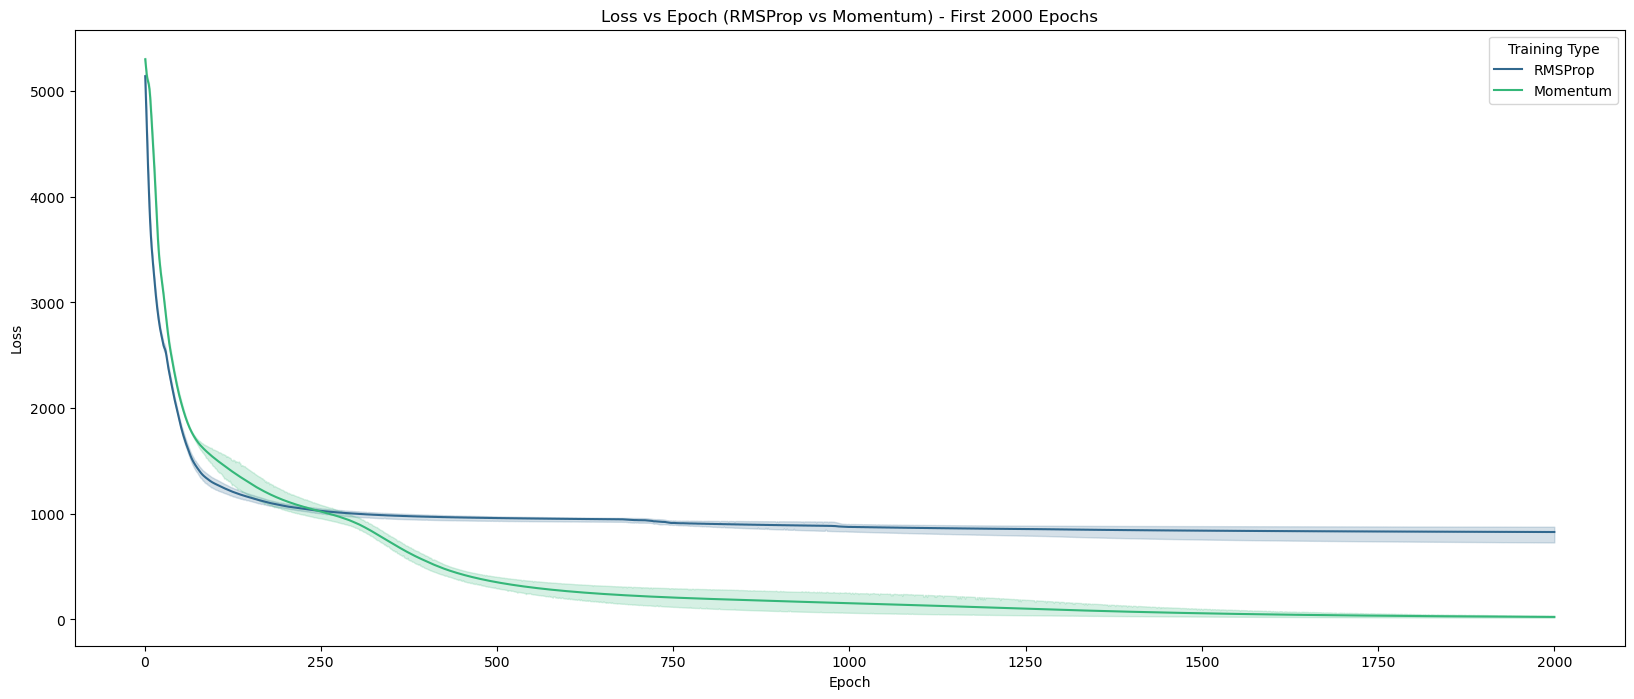

In [41]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=loss_df[loss_df["Epoch"] <= 2000], x="Epoch", y="Loss", hue="Type", palette="viridis")
plt.title("Loss vs Epoch (RMSProp vs Momentum) - First 2000 Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(title="Training Type")
plt.show()

Classification

In [9]:
random_states = [0, 101, 202, 303, 404]
train = rings3_regular_train
test = rings3_regular_test
scaling = True
loss_function_1 = LossCrossEntropy()
loss_function_2 = LossMSE(f1_score=True)
epochs = 1000
learning_rate = 0.05
method = "momentum"

layers_init_softmax = [
                        {"output_size": 10, "activation": LeakyReLU(), "init": "he_normal"},
                        {"output_size": 3, "activation": Softmax(), "init": "xavier_normal"}]

layers_init_nosoftmax = [
                        {"output_size": 10, "activation": LeakyReLU(), "init": "he_normal"},
                        {"output_size": 1, "activation": Sigmoid(), "init": "xavier_normal"}]
stop_f1 = 0.90

times_softmax = []
times_nosoftmax = []
losses_softmax = []
losses_nosoftmax = []
f1_softmax = []
f1_nosoftmax = []
f1_test_softmax = []
f1_test_nosoftmax = []



for i in range(5):
    
    if scaling:    
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(train[["x", "y"]].to_numpy())
        X_test_scaled = scaler.transform(test[["x", "y"]].to_numpy())
    else:
        X_train_scaled = train[["x", "y"]].to_numpy()
        X_test_scaled = test[["x", "y"]].to_numpy()
    
    y_train_one_hot_1 = classes_to_one_hot(train[["c"]].to_numpy() * 1)
    y_test_one_hot_1 = classes_to_one_hot(test[["c"]].to_numpy() * 1)
    y_train_one_hot_2 = train[["c"]].to_numpy() * 1
    y_test_one_hot_2 = test[["c"]].to_numpy() * 1

    nn_1 = MLP(layers_init=layers_init_softmax,
        input=X_train_scaled,
        loss_function=loss_function_1,
        random_state=random_states[i])
    
    nn_2 = MLP(layers_init=layers_init_nosoftmax,
        input=X_train_scaled,
        loss_function=loss_function_2,
        random_state=random_states[i])
    

    t1 = time.time()
    nn_1.train(X_train=X_train_scaled,
            Y_train=y_train_one_hot_1,
            epochs=epochs,
            learning_rate=learning_rate,
            method=method,
            stop_f1=stop_f1)
    t2 = time.time()

    t3 = time.time()
    nn_2.train(X_train=X_train_scaled,
            Y_train=y_train_one_hot_2,
            epochs=epochs,
            learning_rate=learning_rate,
            method=method,
            stop_f1=stop_f1)
    t4 = time.time()
    
    
    pred_1 = nn_1.forward(X_test_scaled)
    f1_1 = nn_1.calculate_f1_macro(y_test_one_hot_1, pred_1)
    
    pred_2 = nn_2.forward(X_test_scaled)
    f1_2 = nn_2.calculate_f1_macro(y_test_one_hot_2, pred_2)
    
    times_softmax.append(t2 - t1)
    times_nosoftmax.append(t4 - t3)
    losses_softmax.append(nn_1.get_training_history()["losses"])
    losses_nosoftmax.append(nn_2.get_training_history()["losses"])
    f1_softmax.append(nn_1.get_training_history()["f1_scores"])
    f1_nosoftmax.append(nn_2.get_training_history()["f1_scores"])
    f1_test_softmax.append(f1_1)
    f1_test_nosoftmax.append(f1_2)
    

Epoch:	0	Loss (Cross Entropy):		1.7450	F1 Score:	0.1554
Epoch:	100	Loss (Cross Entropy):		0.8396	F1 Score:	0.3380
Epoch:	200	Loss (Cross Entropy):		0.6945	F1 Score:	0.6452
Epoch:	300	Loss (Cross Entropy):		0.5829	F1 Score:	0.7449
Epoch:	400	Loss (Cross Entropy):		0.4870	F1 Score:	0.8087
Epoch:	500	Loss (Cross Entropy):		0.4035	F1 Score:	0.8650
Epoch:	600	Loss (Cross Entropy):		0.3491	F1 Score:	0.8880
Epoch:	700	Loss (Cross Entropy):		0.3159	F1 Score:	0.8954
Final epoch:	790	Loss (Cross Entropy):		0.2957	F1 Score:	0.9005
Epoch:	0	Loss (MSE):		1.2518	F1 Score:	0.0805
Epoch:	100	Loss (MSE):		0.6676	F1 Score:	0.6667
Epoch:	200	Loss (MSE):		0.6673	F1 Score:	0.6667
Epoch:	300	Loss (MSE):		0.6670	F1 Score:	0.6667
Epoch:	400	Loss (MSE):		0.6668	F1 Score:	0.6667
Epoch:	500	Loss (MSE):		0.6665	F1 Score:	0.6667
Epoch:	600	Loss (MSE):		0.6659	F1 Score:	0.6667
Epoch:	700	Loss (MSE):		0.6635	F1 Score:	0.6667
Epoch:	800	Loss (MSE):		0.6497	F1 Score:	0.6667
Epoch:	900	Loss (MSE):		0.6414	F1 Score:	0.6

In [17]:
df_class = pd.DataFrame({
    "random_state": random_states,
    "time_softmax": times_softmax,
    "time_nosoftmax": times_nosoftmax,
    "epochs_softmax": [len(loss) for loss in losses_softmax],
    "epochs_nosoftmax": [len(loss) for loss in losses_nosoftmax],
    "loss_softmax": [loss[-1] for loss in losses_softmax],
    "loss_nosoftmax": [loss[-1] for loss in losses_nosoftmax],
    "f1_softmax": [f1[-1] for f1 in f1_softmax],
    "f1_nosoftmax": [f1[-1] for f1 in f1_nosoftmax],
    "f1_test_softmax": f1_test_softmax,
    "f1_test_nosoftmax": f1_test_nosoftmax
})
print(df_class)

   random_state  time_softmax  time_nosoftmax  epochs_softmax  \
0             0      0.381676        0.240486             791   
1           101      0.166384        0.239253             369   
2           202      0.384798        0.240370             851   
3           303      0.464029        0.236414            1000   
4           404      0.272332        0.242431             587   

   epochs_nosoftmax  loss_softmax  loss_nosoftmax  f1_softmax  f1_nosoftmax  \
0              1000      0.295731        0.635341    0.900454      0.683527   
1              1000      0.354361        0.528370    0.900329      0.769354   
2              1000      0.290931        0.483967    0.900357      0.824027   
3              1000      0.328046        0.538619    0.879429      0.758782   
4              1000      0.308266        0.527995    0.900230      0.779283   

   f1_test_softmax  f1_test_nosoftmax  
0         0.889025           0.793602  
1         0.889414           0.853409  
2         0.88

In [12]:
f1_data = []

for run, (f1_rms, f1_mom) in enumerate(zip(f1_softmax, f1_nosoftmax)):
    for epoch, (rms_f1, mom_f1) in enumerate(zip(f1_rms, f1_mom), start=1):
        f1_data.append({"ID": (random_states[run], epoch), "Epoch": epoch, "F1-Score": rms_f1, "Type": "Softmax"})
        f1_data.append({"ID": (random_states[run], epoch), "Epoch": epoch, "F1-Score": mom_f1, "Type": "No Softmax"})

f1_df = pd.DataFrame(f1_data)
f1_df.head()

,ID,Epoch,F1-Score,Type
0,"(0, 1)",1,0.155398,Softmax
1,"(0, 1)",1,0.080460,No Softmax
2,"(0, 2)",2,0.116372,Softmax
3,"(0, 2)",2,0.149733,No Softmax
4,"(0, 3)",3,0.041043,Softmax


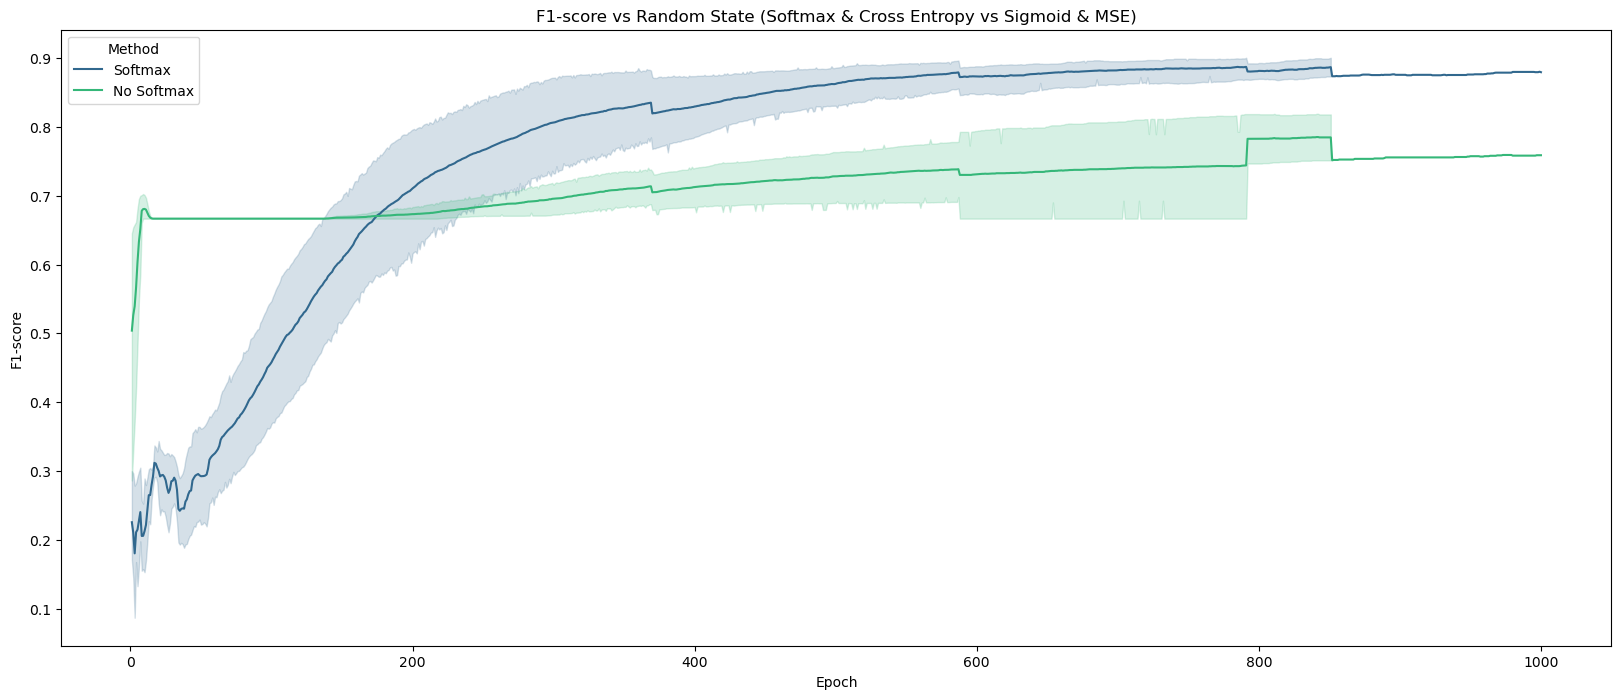

In [16]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=f1_df, x="Epoch", y="F1-Score", hue="Type", palette="viridis")
plt.title("F1-score vs Random State (Softmax & Cross Entropy vs Sigmoid & MSE)")
plt.ylabel("F1-score")
plt.xlabel("Epoch")
plt.legend(title="Method")
plt.show()

Architecture comparison. Regression.

In [7]:
random_states = [0, 101, 202, 303, 404]
losses_a1 = []
losses_a2 = []
losses_a1_test = []
losses_a2_test = []

for i in range(5):
       mlp1 = MLP(input=steps_large_train[["x"]].to_numpy(),
           layers_init = [
                       {"output_size": 10, "activation": ReLU(), "init": "he_normal"},
                       {"output_size": 10, "activation": ReLU(), "init": "he_normal"},
                       {"output_size": 10, "activation": ReLU(), "init": "he_normal"},
                       {"output_size": 1, "activation": Identity(), "init": "uniform"}],
           loss_function=LossMSE(),
           random_state=random_states[i])

       mlp1.train(X_train=steps_large_train[["x"]].to_numpy(),
                Y_train=steps_large_train[["y"]].to_numpy(),
                epochs=10_000,
                learning_rate=0.00015,
                method="momentum",
                weights_decay=0.9,
                verbose=True)
       mlp2 = MLP(input=steps_large_train[["x"]].to_numpy(),
           layers_init = [
                       {"output_size": 20, "activation": ReLU(), "init": "he_normal"},
                       {"output_size": 20, "activation": ReLU(), "init": "he_normal"},
                       {"output_size": 1, "activation": Identity(), "init": "uniform"}],
           loss_function=LossMSE(),
           random_state=random_states[i])

       mlp2.train(X_train=steps_large_train[["x"]].to_numpy(),
                Y_train=steps_large_train[["y"]].to_numpy(),
                epochs=10_000,
                learning_rate=0.0005,
                method="momentum",
                weights_decay=0.9,
                verbose=True)
    
       losses_a1.append(mlp1.get_training_history()["losses"])
       losses_a2.append(mlp2.get_training_history()["losses"])
       pred_1 = mlp1.predict(steps_large_test[["x"]].to_numpy())
       pred_2 = mlp2.predict(steps_large_test[["x"]].to_numpy())
       
       mse = LossMSE()
       loss_1 = mse(steps_large_test[["y"]].to_numpy(), pred_1)
       loss_2 = mse(steps_large_test[["y"]].to_numpy(), pred_2)
       losses_a1_test.append(loss_1)
       losses_a2_test.append(loss_2)

df_arch = pd.DataFrame({
       "random_state": random_states,
       "loss_train_a1": [loss[-1] for loss in losses_a1],
       "loss_train_a2": [loss[-1] for loss in losses_a2],
       "loss_test_a1": losses_a1_test,
       "loss_test_a2": losses_a2_test})

Epoch:	0	Loss (MSE):	6741.2023
Epoch:	1000	Loss (MSE):	1096.0453
Epoch:	2000	Loss (MSE):	610.5804
Epoch:	3000	Loss (MSE):	383.7615
Epoch:	4000	Loss (MSE):	287.2641
Epoch:	5000	Loss (MSE):	68.4853
Epoch:	6000	Loss (MSE):	39.9871
Epoch:	7000	Loss (MSE):	27.2696
Epoch:	8000	Loss (MSE):	22.6808
Epoch:	9000	Loss (MSE):	20.1198
Final epoch:	9999	Loss (MSE):	21.7087
Epoch:	0	Loss (MSE):	5853.6496
Epoch:	1000	Loss (MSE):	1946.9205
Epoch:	2000	Loss (MSE):	1467.5813
Epoch:	3000	Loss (MSE):	239.9969
Epoch:	4000	Loss (MSE):	123.8318
Epoch:	5000	Loss (MSE):	116.6290
Epoch:	6000	Loss (MSE):	110.3829
Epoch:	7000	Loss (MSE):	109.0062
Epoch:	8000	Loss (MSE):	108.0488
Epoch:	9000	Loss (MSE):	107.3628
Final epoch:	9999	Loss (MSE):	106.8445
Epoch:	0	Loss (MSE):	6714.0683
Epoch:	1000	Loss (MSE):	141.2220
Epoch:	2000	Loss (MSE):	1826.5863
Epoch:	3000	Loss (MSE):	958.7777
Epoch:	4000	Loss (MSE):	586.4470
Epoch:	5000	Loss (MSE):	432.6427
Epoch:	6000	Loss (MSE):	364.8890
Epoch:	7000	Loss (MSE):	333.3263
Epoch:

In [8]:
print(df_arch)

   random_state  loss_train_a1  loss_train_a2  loss_test_a1  loss_test_a2
0             0      21.708719     106.844477     19.112177    117.471894
1           101     212.988012     100.682505    215.270042    110.531772
2           202     116.374664      12.421101    126.789477      9.883398
3           303      10.390008     106.065282      8.353670    116.841652
4           404       8.889046      65.079993      6.764731     73.307810


In [9]:
arch_loss_data = []

for run, (loss_a1, loss_a2) in enumerate(zip(losses_a1, losses_a2)):
    for epoch, (a1_loss, a2_loss) in enumerate(zip(loss_a1, loss_a2), start=1):
        arch_loss_data.append({"ID": (random_states[run], epoch), "Epoch": epoch, "Loss": a1_loss, "Type": "Arch: 3 x 10"})
        arch_loss_data.append({"ID": (random_states[run], epoch), "Epoch": epoch, "Loss": a2_loss, "Type": "Arch: 2 x 20"})
        
arch_loss_df = pd.DataFrame(arch_loss_data)
arch_loss_df.head()


,ID,Epoch,Loss,Type
0,"(0, 1)",1,6741.202311,Arch: 3 x 10
1,"(0, 1)",1,5853.649563,Arch: 2 x 20
2,"(0, 2)",2,6506.510691,Arch: 3 x 10
3,"(0, 2)",2,4666.740597,Arch: 2 x 20
4,"(0, 3)",3,6084.604517,Arch: 3 x 10


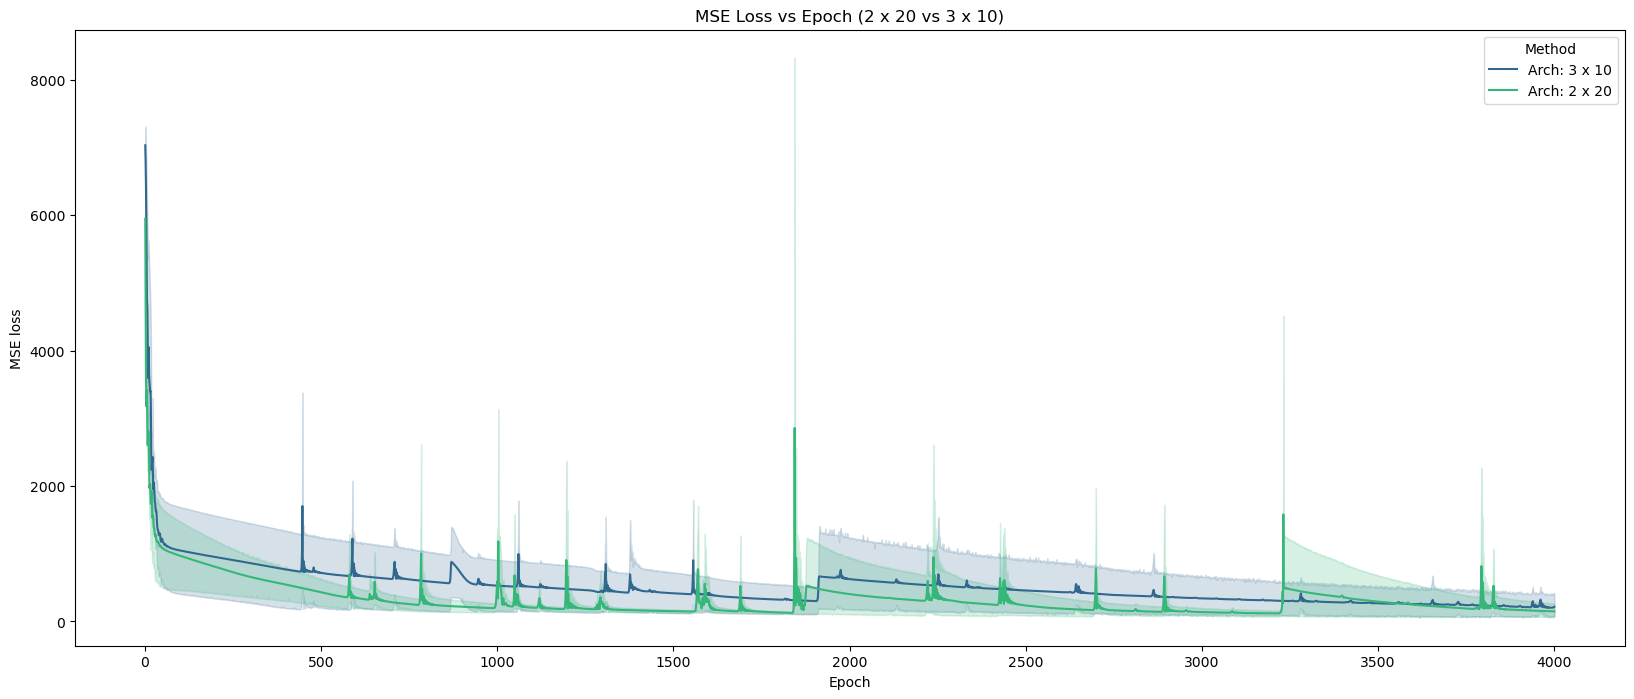

In [12]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=arch_loss_df[arch_loss_df["Epoch"] <= 4000], x="Epoch", y="Loss", hue="Type", palette="viridis")
plt.title("MSE Loss vs Epoch (2 x 20 vs 3 x 10)")
plt.ylabel("MSE loss")
plt.xlabel("Epoch")
plt.legend(title="Method")
plt.show()

Architecture choice. Classification.

In [16]:
random_states = [0, 101, 202, 303, 404]
train = rings5_regular_train
test = rings5_regular_test
scaling = True
loss_function = LossCrossEntropy()
epochs = 1000
learning_rate = 0.05
method = "momentum"

layers_init_10 = [
                        {"output_size": 10, "activation": ReLU(), "init": "he_normal"},
                        {"output_size": 10, "activation": ReLU(), "init": "he_normal"},
                        {"output_size": 10, "activation": ReLU(), "init": "he_normal"},
                        {"output_size": 5, "activation": Softmax(), "init": "xavier_normal"}]

layers_init_20 = [
                        {"output_size": 20, "activation": ReLU(), "init": "he_normal"},
                        {"output_size": 20, "activation": ReLU(), "init": "he_normal"},
                        {"output_size": 5, "activation": Sigmoid(), "init": "xavier_normal"}]
stop_f1 = 0.90

times_10 = []
times_20 = []
losses_10 = []
losses_20 = []
f1_10_list = []
f1_20_list = []
f1_test_10 = []
f1_test_20 = []


for i in range(5):
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(train[["x", "y"]].to_numpy())
    X_test_scaled = scaler.transform(test[["x", "y"]].to_numpy())
    
    y_train_one_hot = classes_to_one_hot(train[["c"]].to_numpy() * 1)
    y_test_one_hot = classes_to_one_hot(test[["c"]].to_numpy() * 1)

    nn_10 = MLP(layers_init=layers_init_10,
        input=X_train_scaled,
        loss_function=loss_function,
        random_state=random_states[i])
    
    nn_20 = MLP(layers_init=layers_init_20,
        input=X_train_scaled,
        loss_function=loss_function,
        random_state=random_states[i])
    

    t1 = time.time()
    nn_10.train(X_train=X_train_scaled,
            Y_train=y_train_one_hot,
            epochs=epochs,
            learning_rate=learning_rate,
            method=method,
            stop_f1=stop_f1)
    t2 = time.time()

    t3 = time.time()
    nn_20.train(X_train=X_train_scaled,
            Y_train=y_train_one_hot,
            epochs=epochs,
            learning_rate=learning_rate,
            method=method,
            stop_f1=stop_f1)
    t4 = time.time()
    
    
    pred_10 = nn_10.forward(X_test_scaled)
    f1_10 = nn_10.calculate_f1_macro(y_test_one_hot, pred_10)
    
    pred_20 = nn_20.forward(X_test_scaled)
    f1_20 = nn_20.calculate_f1_macro(y_test_one_hot, pred_20)
    
    times_10.append(t2 - t1)
    times_20.append(t4 - t3)
    losses_10.append(nn_10.get_training_history()["losses"])
    losses_20.append(nn_20.get_training_history()["losses"])
    f1_10_list.append(nn_10.get_training_history()["f1_scores"])
    f1_20_list.append(nn_20.get_training_history()["f1_scores"])
    f1_test_10.append(f1_10)
    f1_test_20.append(f1_20)
    

Epoch:	0	Loss (Cross Entropy):		1.6750	F1 Score:	0.0078
Epoch:	100	Loss (Cross Entropy):		0.8720	F1 Score:	0.4413
Epoch:	200	Loss (Cross Entropy):		0.3320	F1 Score:	0.8721
Epoch:	300	Loss (Cross Entropy):		0.2809	F1 Score:	0.8975
Final epoch:	306	Loss (Cross Entropy):		0.2742	F1 Score:	0.9004
Epoch:	0	Loss (Cross Entropy):		1.1436	F1 Score:	0.2091
Epoch:	100	Loss (Cross Entropy):		0.9634	F1 Score:	0.3467
Epoch:	200	Loss (Cross Entropy):		0.7665	F1 Score:	0.5554
Epoch:	300	Loss (Cross Entropy):		0.6603	F1 Score:	0.6246
Epoch:	400	Loss (Cross Entropy):		0.5808	F1 Score:	0.7475
Epoch:	500	Loss (Cross Entropy):		0.5204	F1 Score:	0.8044
Epoch:	600	Loss (Cross Entropy):		0.4780	F1 Score:	0.8217
Epoch:	700	Loss (Cross Entropy):		0.4481	F1 Score:	0.8358
Epoch:	800	Loss (Cross Entropy):		0.4227	F1 Score:	0.8479
Epoch:	900	Loss (Cross Entropy):		0.4000	F1 Score:	0.8608
Final epoch:	999	Loss (Cross Entropy):		0.3808	F1 Score:	0.8786
Epoch:	0	Loss (Cross Entropy):		1.7326	F1 Score:	0.0652
Epoch:	1

In [20]:
df_arch_cl = pd.DataFrame({
    "random_states": random_states,
    "time_10": times_10,
    "time_20": times_20,
    "f1_10_train": [f1[-1] for f1 in f1_10_list],
    "f1_20_train": [f1[-1] for f1 in f1_20_list],
    "f1_test_10": f1_test_10,
    "f1_test_20": f1_test_20})
df_arch_cl

,random_states,time_10,time_20,f1_10_train,f1_20_train,f1_test_10,f1_test_20
0,0,0.256498,0.704952,0.900384,0.878551,0.845052,0.825183
1,101,0.196085,0.752848,0.900528,0.878129,0.867601,0.829222
2,202,0.159453,0.765904,0.900586,0.849885,0.842611,0.808164
3,303,0.558777,0.707687,0.900281,0.880568,0.839809,0.823124
4,404,0.083499,0.722416,0.901761,0.867124,0.846073,0.794889


In [22]:
f1_data = []

for run, (f1_10, f1_20) in enumerate(zip(f1_10_list, f1_20_list)):
    for epoch, (f1_10_epoch, f1_20_epoch) in enumerate(zip(f1_10, f1_20), start=1):
        f1_data.append({"ID": (random_states[run], epoch), "Epoch": epoch, "F1-Score": f1_10_epoch, "Loss": losses_10[run][epoch - 1], "Type": "Arch: 3 x 10"})
        f1_data.append({"ID": (random_states[run], epoch), "Epoch": epoch, "F1-Score": f1_20_epoch, "Loss": losses_20[run][epoch - 1], "Type": "Arch: 2 x 20"})
f1_df = pd.DataFrame(f1_data)
f1_df.head()

,ID,Epoch,F1-Score,Loss,Type
0,"(0, 1)",1,0.007843,1.674978,Arch: 3 x 10
1,"(0, 1)",1,0.209062,1.143635,Arch: 2 x 20
2,"(0, 2)",2,0.015714,1.606433,Arch: 3 x 10
3,"(0, 2)",2,0.213914,1.149575,Arch: 2 x 20
4,"(0, 3)",3,0.007273,1.590831,Arch: 3 x 10


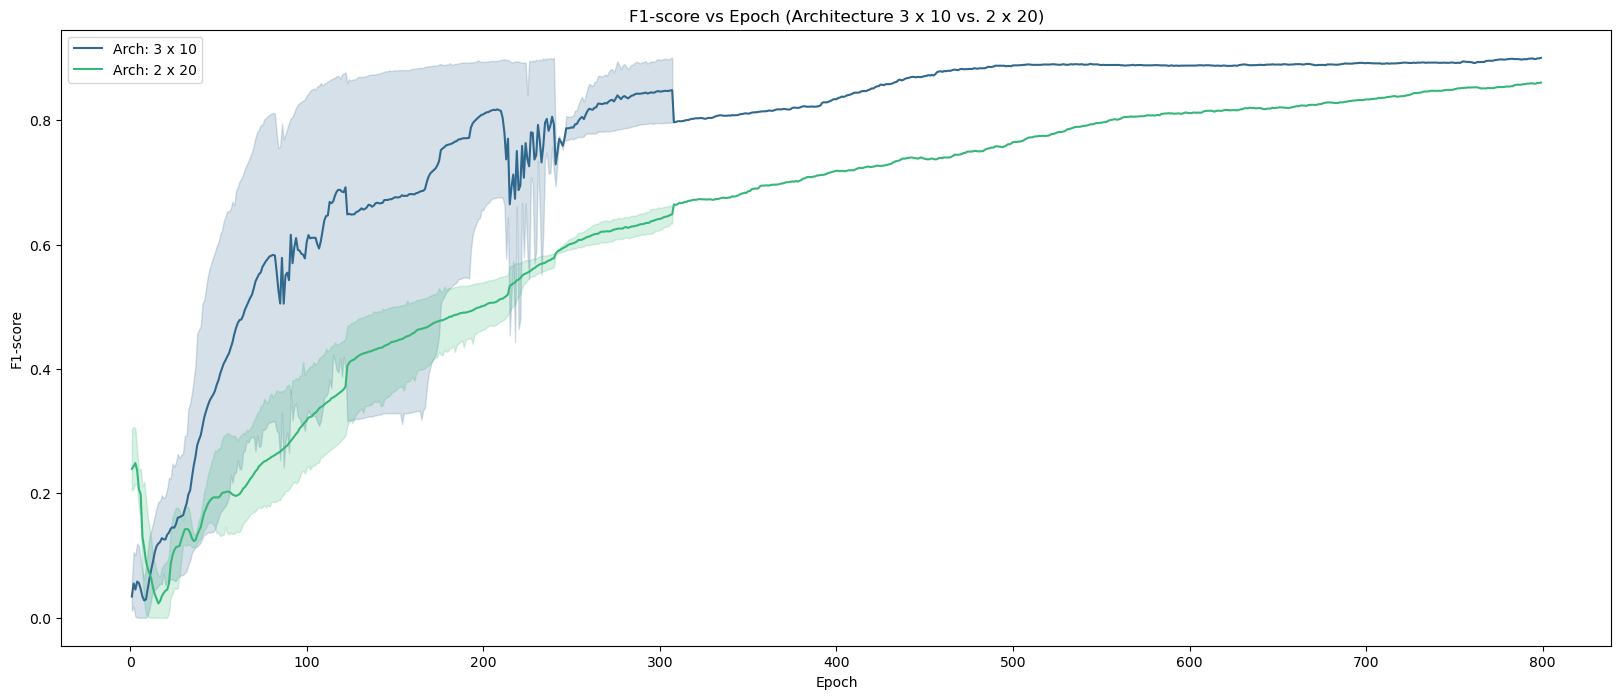

In [23]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=f1_df, x="Epoch", y="F1-Score", hue="Type", palette="viridis")
plt.title("F1-score vs Epoch (Architecture 3 x 10 vs. 2 x 20)")
plt.ylabel("F1-score")
plt.xlabel("Epoch")
plt.legend()
plt.show()

Regularization

Regression

In [10]:
from visualization.analysis import run_regularization_regression
from network.losses import LossFunction 

def regularization_regression_tests(train_df: pd.DataFrame,
                       test_df: pd.DataFrame,
                       layers_init: list,
                       loss_function: LossFunction,
                       lambdas: list,
                       seeds: list,
                       epochs: int = 1000,
                       method: str = "sgd",
                       learning_rate: float = 0.001,
                       batch_size: int = None,
                       clip_value: float = None,
                       patience: int = None,
                       delta: float = None):
    
    all_results = []
    loss_data = []
    for seed in seeds:
        L1_results, L2_results, loss_noreg, y_pred_noreg,losses_noreg = run_regularization_regression(
            train_df=train_df,
            test_df=test_df,
            layers_init=layers_init,
            loss_function=loss_function,
            lambdas=lambdas,
            epochs=epochs,
            method=method,
            learning_rate=learning_rate,
            batch_size=batch_size,
            clip_value=clip_value,
            patience=patience,
            delta=delta,
            plotting=False,
            random_state=seed
        )
       
        for lambd, history in L1_results.items():
            all_results.append({"Seed": seed, "Lambda": lambd, "Loss": history["losses"][-1], "Type": "L1"})
            
        for lambd, history in L2_results.items():
            all_results.append({"Seed": seed, "Lambda": lambd, "Loss": history["losses"][-1], "Type": "L2"})
        
            
        for epoch, loss in enumerate(losses_noreg):
            loss_data.append({"Epoch": epoch, "Loss": loss, "Regularization": "None", "Lambda": 0})
        for lambd, history in L1_results.items():
            for epoch, loss in enumerate(history["losses"]):
                loss_data.append({"Epoch": epoch, "Loss": loss, "Regularization": "L1", "Lambda": lambd})
        for lambd, history in L2_results.items():
            for epoch, loss in enumerate(history["losses"]):
                loss_data.append({"Epoch": epoch, "Loss": loss, "Regularization": "L2", "Lambda": lambd})
            
    
    boxplot_df = pd.DataFrame(all_results)
    loss_df = pd.DataFrame(loss_data)
    
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=boxplot_df, x="Lambda", y="Loss", hue="Type", palette="bright")
    plt.axhline(y=losses_noreg[-1], color='red', linestyle='--', label='No Regularization Loss')
    plt.title("Loss vs Lambda for L1 and L2 Regularization (Different Seeds)")
    plt.xlabel("Lambda")
    plt.ylabel("Loss")
    plt.legend(title="Regularization Type")
    plt.show()
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=boxplot_df[boxplot_df["Lambda"] < 1.0], x="Lambda", y="Loss", hue="Type", palette="bright")
    plt.axhline(y=losses_noreg[-1], color='red', linestyle='--', label='No Regularization Loss')
    plt.title("Loss vs Lambda for L1 and L2 Regularization (Different Seeds)")
    plt.ylim(0, 30)
    plt.xlabel("Lambda")
    plt.ylabel("Loss")
    plt.legend(title="Regularization Type")
    plt.show()
    
    plt.figure(figsize=(12, 8))
    sns.lineplot(data=loss_df[loss_df["Epoch"] >= 100], x="Epoch", y="Loss", hue="Regularization", markers=True, palette="bright")
    plt.title("Loss over Epochs for Different Regularization Types (from epoch 100)")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(title="Regularization")
    plt.grid()
    plt.show()
    
    return boxplot_df, loss_df
    
    

Training without regularization
Early stopping at epoch 2607 with loss 7.0237 and validation loss 3.2090.
Training with L1 regularization
Early stopping at epoch 2303 with loss 13.9851 and validation loss 7.9216.
Early stopping at epoch 2619 with loss 8.2505 and validation loss 6.5986.
Early stopping at epoch 1396 with loss 175.3548 and validation loss 51.1323.
Early stopping at epoch 1401 with loss 206.9315 and validation loss 49.2155.
Early stopping at epoch 3032 with loss 17.6921 and validation loss 17.0465.
Early stopping at epoch 3192 with loss 107.0285 and validation loss 112.7667.
Early stopping at epoch 2530 with loss 994.3160 and validation loss 990.8077.
Training with L2 regularization
Early stopping at epoch 2387 with loss 8.9853 and validation loss 6.8495.
Early stopping at epoch 1438 with loss 218.5500 and validation loss 40.7308.
Early stopping at epoch 1425 with loss 214.5159 and validation loss 49.9952.
Early stopping at epoch 1441 with loss 224.1702 and validation loss

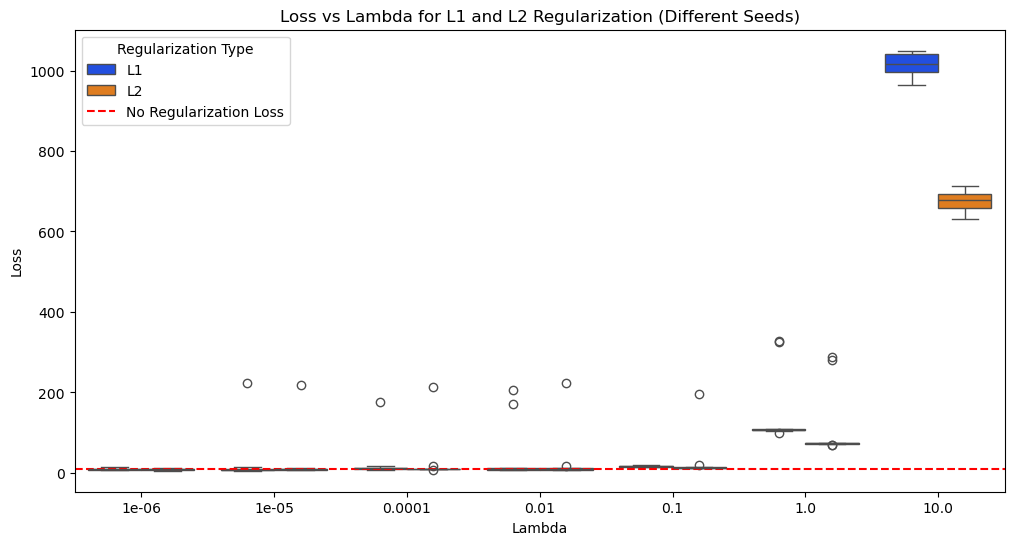

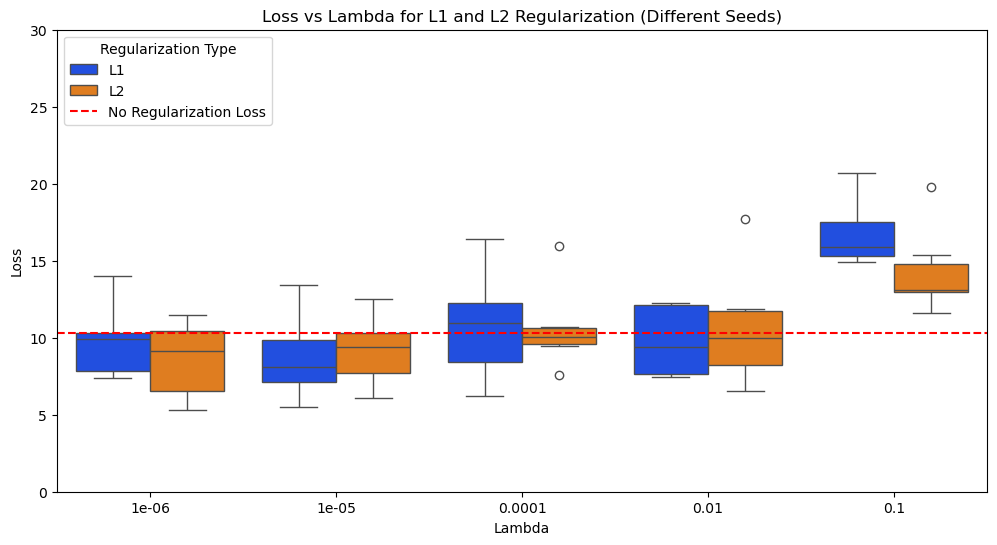

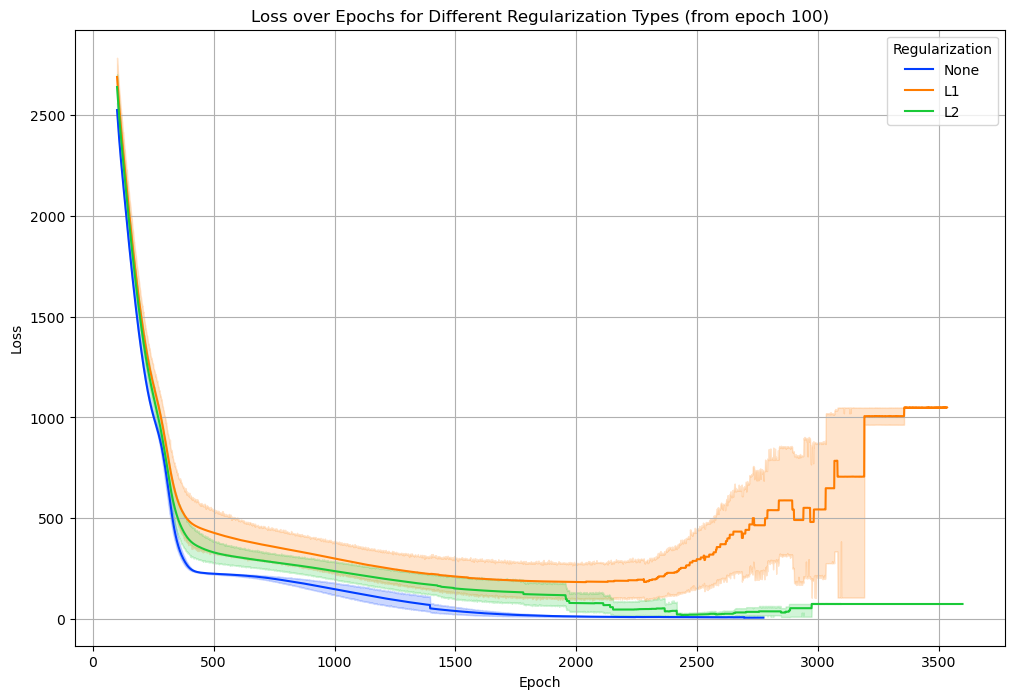

In [11]:
boxplot_df, loss_df = regularization_regression_tests(train_df = multimodal_sparse_train,
                   test_df = multimodal_sparse_test,
                        layers_init = [
                            {"output_size": 100, "activation": Tanh(), "init": "uniform"},
                            {"output_size": 1, "activation": Identity(), "init": "uniform"}
                        ],
                        loss_function = LossMSE(),
                        lambdas=[0.000001, 0.00001, 0.0001, 0.01, 0.1, 1, 10],
                        method="momentum",
                        learning_rate=0.1,
                        epochs=5000,
                        clip_value=1,     
                        patience=1000,
                        delta=3,
                        seeds=[0, 101, 202, 303, 404, 505, 606, 707, 808, 909])

Regularization

Classification

In [9]:
from visualization.analysis import run_regularization_classification
from network.losses import LossFunction 

def regularization_clf_tests(train_df: pd.DataFrame,
                       test_df: pd.DataFrame,
                       layers_init: list,
                       loss_function: LossFunction,
                       lambdas: list,
                       seeds: list,
                       epochs: int = 1000,
                       method: str = "sgd",
                       learning_rate: float = 0.001,
                       batch_size: int = None,
                       clip_value: float = None,
                       patience: int = None,
                       delta: float = None):
    
    all_results = []
    loss_data = []
    
    for seed in seeds:
        L1_results, L2_results, f1_noreg_test, best_l1_lambda, best_l2_lambda, best_l1_f1, best_l2_f1, f1_scores_noreg = run_regularization_classification(
            train_df=train_df,
            test_df=test_df,
            layers_init=layers_init,
            loss_function=loss_function,
            lambdas=lambdas,
            epochs=epochs,
            method=method,
            learning_rate=learning_rate,
            batch_size=batch_size,
            clip_value=clip_value,
            patience=patience,
            delta=delta,
            plotting=False,
            random_state=seed
        )
       
        for lambd, history in L1_results.items():
            all_results.append({"Seed": seed, "Lambda": lambd, "F1": history["f1_scores"][-1], "Type": "L1"})
            
        for lambd, history in L2_results.items():
            all_results.append({"Seed": seed, "Lambda": lambd, "F1": history["f1_scores"][-1], "Type": "L2"})
        
            
        for epoch, loss in enumerate(f1_scores_noreg):
            loss_data.append({"Epoch": epoch, "F1": loss, "Regularization": "None", "Lambda": 0})
        for lambd, history in L1_results.items():
            for epoch, loss in enumerate(history["f1_scores"]):
                loss_data.append({"Epoch": epoch, "F1": loss, "Regularization": "L1", "Lambda": lambd})
        for lambd, history in L2_results.items():
            for epoch, loss in enumerate(history["f1_scores"]):
                loss_data.append({"Epoch": epoch, "F1": loss, "Regularization": "L2", "Lambda": lambd})
            
    
    boxplot_df = pd.DataFrame(all_results)
    loss_df = pd.DataFrame(loss_data)
    
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=boxplot_df, x="Lambda", y="F1", hue="Type", palette="bright")
    plt.axhline(y=f1_scores_noreg[-1], color='red', linestyle='--', label='No Regularization Loss')
    plt.title("F1-score vs Lambda for L1 and L2 Regularization (Different Seeds)")
    plt.xlabel("Lambda")
    plt.ylabel("F1-score")
    plt.legend(title="Regularization Type")
    plt.show()
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=boxplot_df[boxplot_df["Lambda"] < 1.0], x="Lambda", y="F1", hue="Type", palette="bright")
    plt.title("F1-score vs Lambda for L1 and L2 Regularization (Different Seeds)")
    plt.xlabel("Lambda")
    plt.ylabel("F1-score")
    plt.legend(title="Regularization Type")
    plt.show()
    
    plt.figure(figsize=(12, 8))
    sns.lineplot(data=loss_df[loss_df["Epoch"] >= 100], x="Epoch", y="F1", hue="Regularization", markers=True, palette="bright")
    plt.title("Loss over Epochs for Different Regularization Types (from epoch 100)")
    plt.xlabel("Epoch")
    plt.ylabel("F1-score")
    plt.legend(title="Regularization")
    plt.grid()
    plt.show()
    
    return boxplot_df, loss_df

Training without regularization...
Early stopping at epoch 1001 with loss 0.8771 and validation loss 0.3464.
Training with L1 regularization...
Early stopping at epoch 1001 with loss 0.8779 and validation loss 0.3472.
Early stopping at epoch 1001 with loss 0.8783 and validation loss 0.3474.
Early stopping at epoch 1001 with loss 0.8828 and validation loss 0.3513.
Early stopping at epoch 1001 with loss 1.4861 and validation loss 0.9538.
Early stopping at epoch 1001 with loss 6.9526 and validation loss 6.4024.
Early stopping at epoch 1001 with loss 61.8286 and validation loss 61.0978.
Early stopping at epoch 1001 with loss 604.1008 and validation loss 603.5541.
Training with L2 regularization...
Early stopping at epoch 1001 with loss 0.8774 and validation loss 0.3461.
Early stopping at epoch 1001 with loss 0.8778 and validation loss 0.3465.
Early stopping at epoch 1001 with loss 0.8822 and validation loss 0.3518.
Early stopping at epoch 1001 with loss 1.3297 and validation loss 0.7960.
E

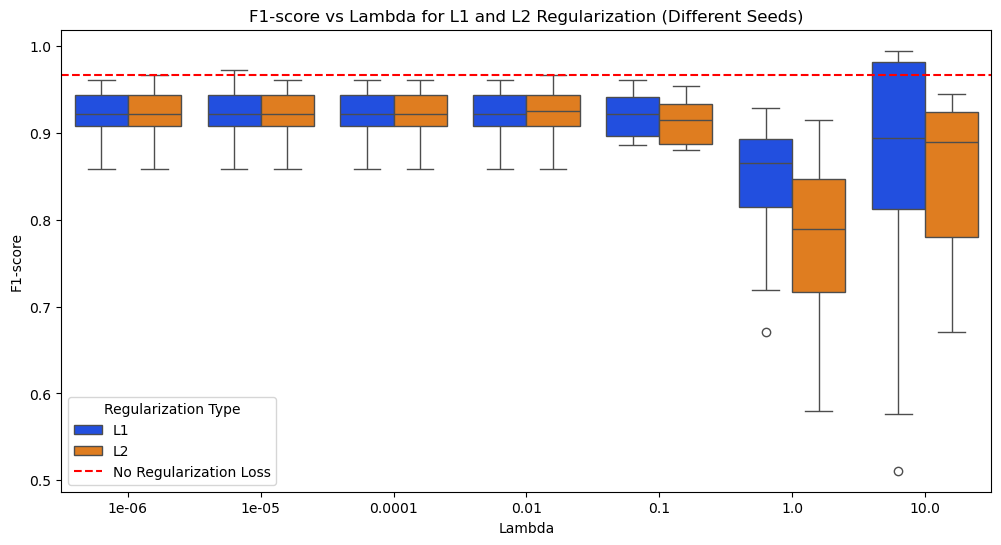

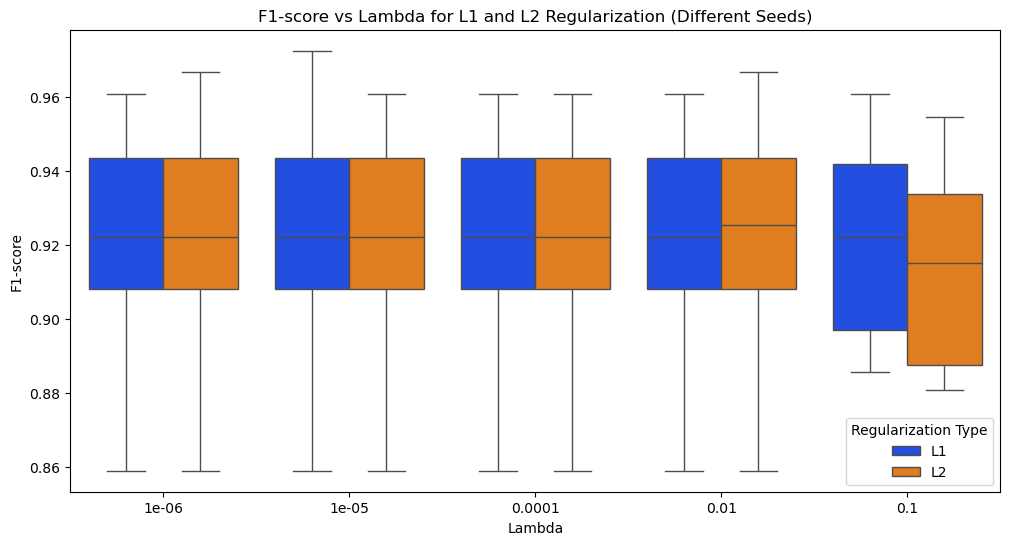

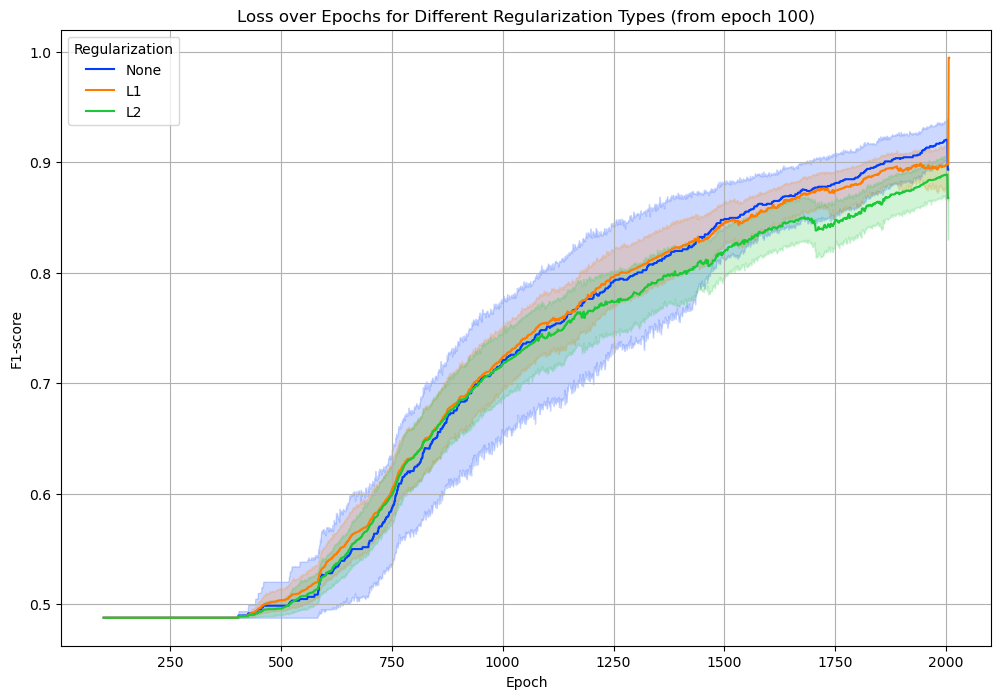

(     Seed     Lambda        F1 Type
 0       0   0.000001  0.928836   L1
 1       0   0.000010  0.928836   L1
 2       0   0.000100  0.928836   L1
 3       0   0.010000  0.928836   L1
 4       0   0.100000  0.922058   L1
 ..    ...        ...       ...  ...
 135   909   0.000100  0.960622   L2
 136   909   0.010000  0.966590   L2
 137   909   0.100000  0.954530   L2
 138   909   1.000000  0.861893   L2
 139   909  10.000000  0.670764   L2
 
 [140 rows x 4 columns],
         Epoch        F1 Regularization  Lambda
 0           0  0.487805           None     0.0
 1           1  0.487805           None     0.0
 2           2  0.487805           None     0.0
 3           3  0.487805           None     0.0
 4           4  0.487805           None     0.0
 ...       ...       ...            ...     ...
 300627   1999  0.656863             L2    10.0
 300628   2000  0.670764             L2    10.0
 300629   2001  0.670764             L2    10.0
 300630   2002  0.670764             L2    10.0
 

In [10]:
regularization_clf_tests(train_df =xor3_balance_train,
                                  test_df=xor3_balance_test,
                                  layers_init=[
                                {"output_size": 10, "activation": LeakyReLU(), "init": "he_normal"},
                                {"output_size": 10, "activation": LeakyReLU(), "init": "he_normal"},
                                {"output_size": 2, "activation": Softmax(), "init": "xavier_normal"}],
                                  loss_function=LossCrossEntropy(),
                                  lambdas=[0.000001, 0.00001, 0.0001, 0.01, 0.1, 1, 10],
                                  epochs=5000,
                                  method="momentum",
                                  learning_rate=0.05,
                                  batch_size=None,
                                  clip_value=None,
                                  patience=1000,
                                  delta=10,
                                  seeds= [0, 101, 202, 303, 404, 505, 606, 707, 808, 909])